In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
file_path = 'BlinkIt grocery Dataset.xlsx'
df = pd.read_excel(file_path)

### DATA CLEANING

In [3]:
print("First 5 Rows of the DataFrame:")
df.head()

First 5 Rows of the DataFrame:


,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [4]:
print("\nDataFrame Information:")
df.info()


DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
print("\nDescriptive Statistics:")
df.describe().round(2)


Descriptive Statistics:


,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.00,8523.00,7060.00,8523.00,8523.00
mean,2016.45,0.07,12.86,140.99,3.97
std,3.19,0.05,4.64,62.28,0.61
min,2011.00,0.00,4.56,31.29,1.00
25%,2014.00,0.03,8.77,93.83,4.00
50%,2016.00,0.05,12.60,143.01,4.00
75%,2018.00,0.09,16.85,185.64,4.20
max,2022.00,0.33,21.35,266.89,5.00


In [6]:
print("\nMissing Values Count per Column:")
missing_values = df.isnull().sum()
print(missing_values)


Missing Values Count per Column:
Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64


<Axes: >

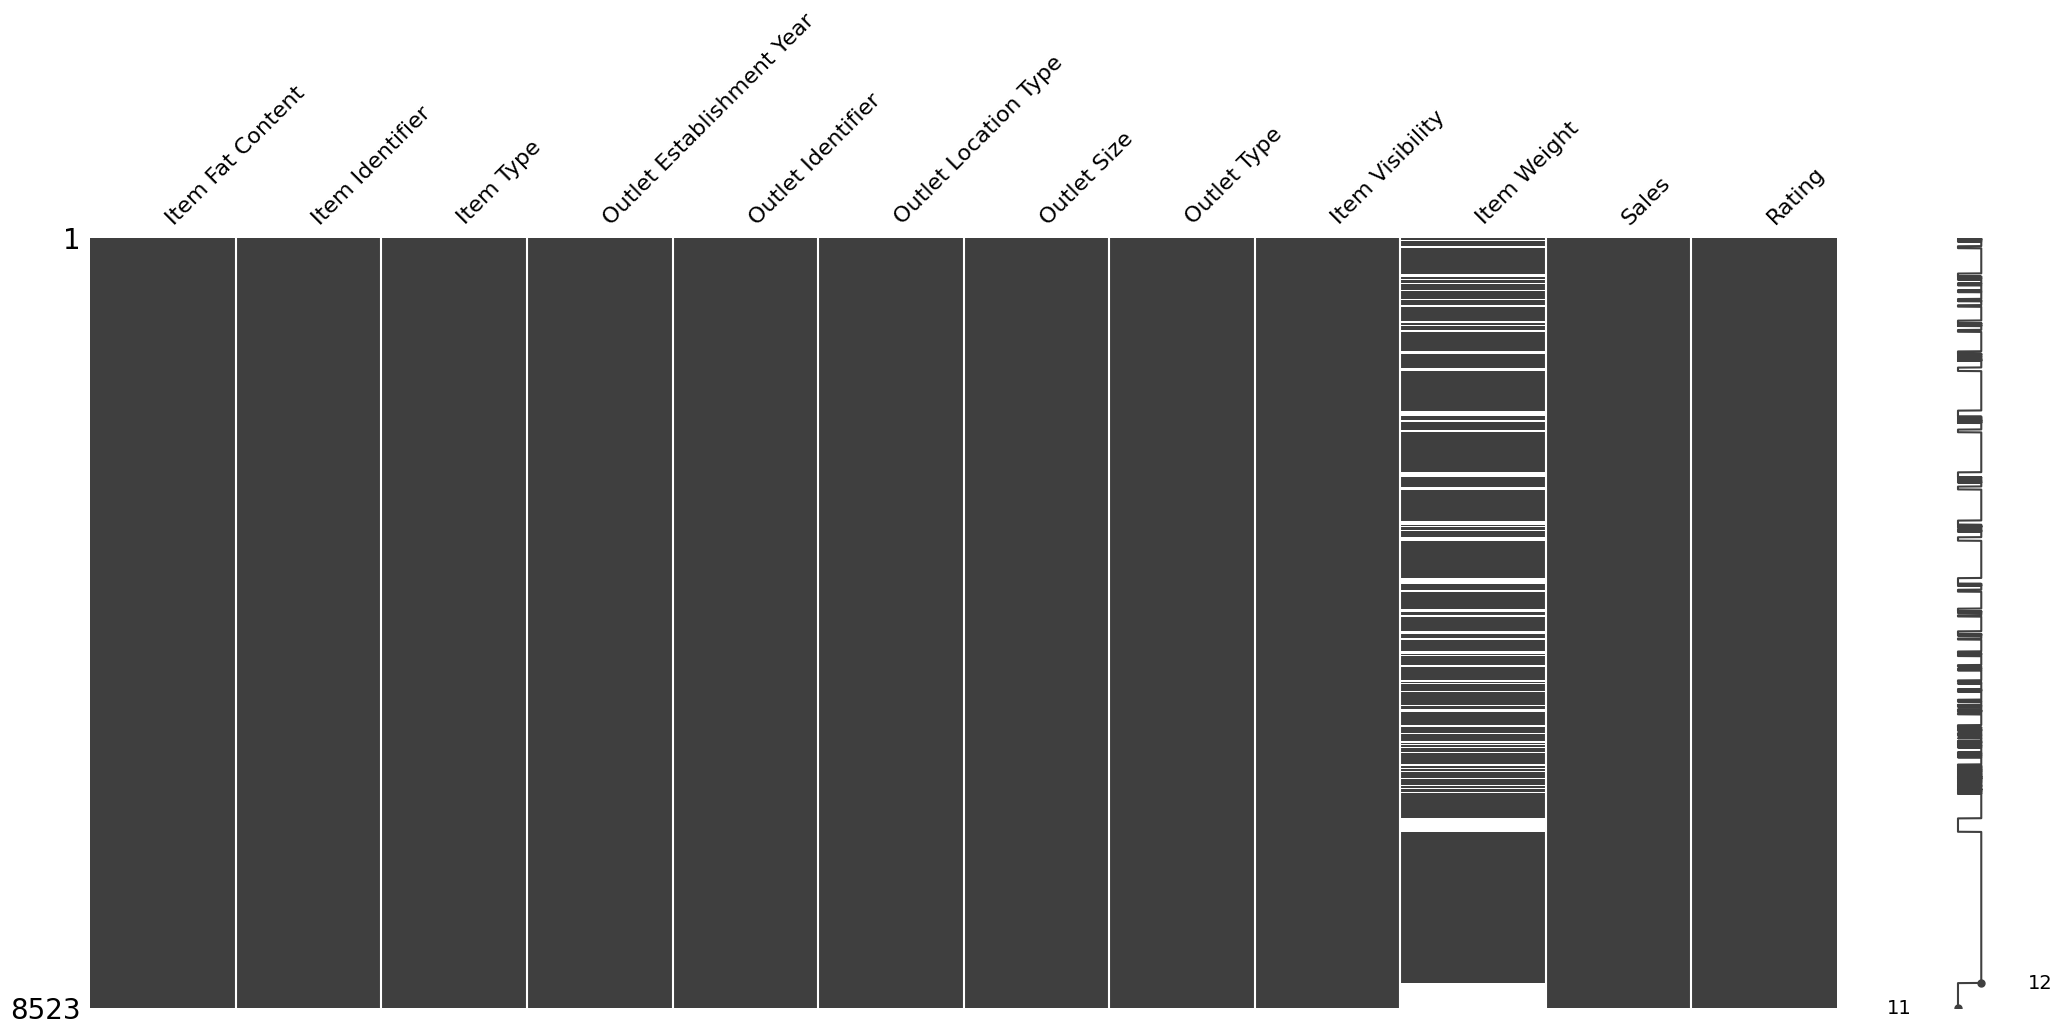

In [7]:
msno.matrix(df)

In [8]:
df = df.drop_duplicates()
print(df.shape)

(8523, 12)


In [9]:
df['Item Weight'].fillna(df['Item Weight'].median(), inplace=True)

C:\Users\abhin\AppData\Local\Temp\ipykernel_9308\2865185454.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item Weight'].fillna(df['Item Weight'].median(), inplace=True)


In [10]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'low fat': 'Low Fat','LF': 'Low Fat',
                                                         'reg': 'Regular'})
df.info(), df['Item Fat Content'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                8523 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


(None,
 Item Fat Content
 Low Fat    5517
 Regular    3006
 Name: count, dtype: int64)

### DATA ANALYSIS

In [11]:
totalsales = df['Sales'].sum().round(2)
print("TOTAL SALES ",totalsales)

TOTAL SALES  1201681.49


In [12]:
AvgSales = df['Sales'].mean().round(2)
print("AVERAGE SALES ",AvgSales)

AVERAGE SALES  140.99


In [13]:
AvgRatings = df['Rating'].mean().round(2)
print("AVERAGE RATINGS ",AvgRatings)

AVERAGE RATINGS  3.97


In [14]:
print("NUMBER OF ITEMS ")

NUMBER OF ITEMS 


In [15]:
df_Sales = df.groupby('Outlet Establishment Year')['Sales'].sum().reset_index().round(2)
df_Sales

,Outlet Establishment Year,Sales
0,2011,78131.57
1,2012,130476.86
2,2014,131809.02
3,2015,130942.78
4,2016,132113.37
5,2017,133103.91
6,2018,204522.26
7,2020,129103.96
8,2022,131477.78


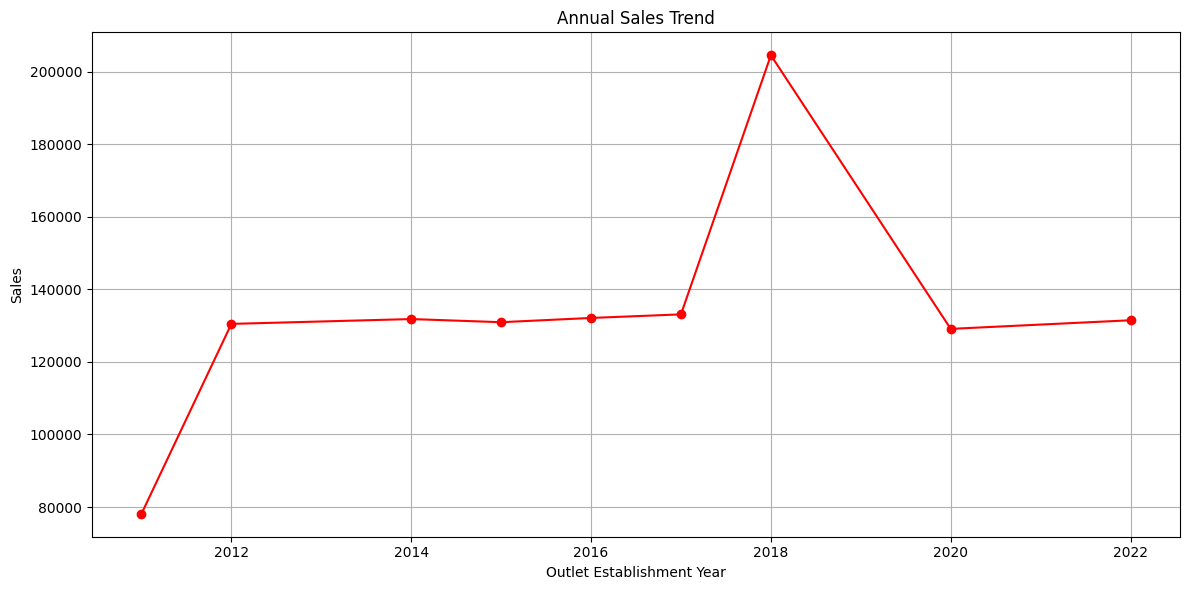

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df_Sales['Outlet Establishment Year'], df_Sales['Sales'], marker='o', linestyle='-', color='r')
plt.title('Annual Sales Trend')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:


df_top = df.groupby('Item Type')['Sales'].sum().reset_index()
df_sort = df_top.sort_values(by='Sales',ascending=False).reset_index(drop = True)
df_sort.index = df_sort.index + 1 
print("Top 5 Selling Items")
df_sort.head(5)

Top 5 Selling Items


,Item Type,Sales
1,Fruits and Vegetables,178124.0810
2,Snack Foods,175433.9224
3,Household,135976.5254
4,Frozen Foods,118558.8814
5,Dairy,101276.4616


In [18]:
print("Bottom 5 Selling Items")
df_sort.tail(5)

Bottom 5 Selling Items


,Item Type,Sales
12,Hard Drinks,29334.6806
13,Others,22451.8916
14,Starchy Foods,21880.0274
15,Breakfast,15596.6966
16,Seafood,9077.8700


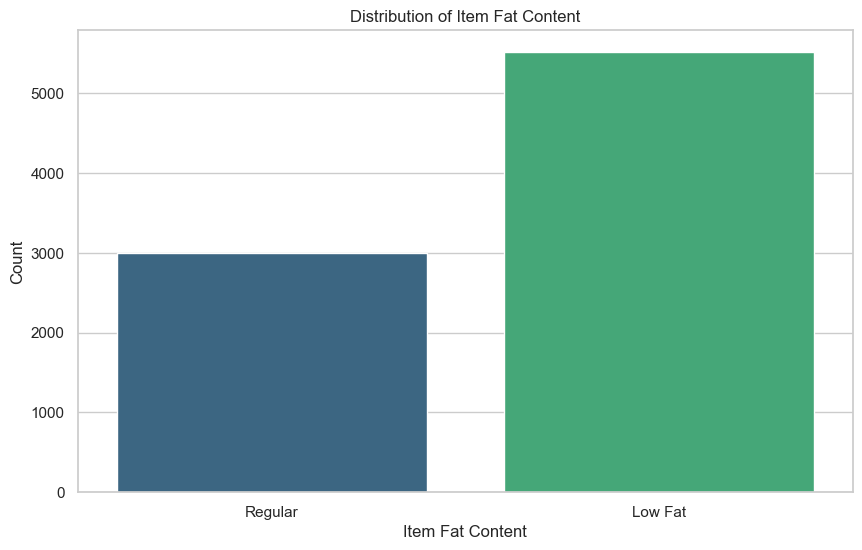

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting environment
sns.set(style="whitegrid")

# Plot the distribution of the 'Item Fat Content'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Item Fat Content',hue='Item Fat Content', palette='viridis')
plt.title('Distribution of Item Fat Content')
plt.xlabel('Item Fat Content')
plt.ylabel('Count')
plt.show()

In [20]:
# Outlet Type with the Highest Sales
df_grouped = df.groupby('Outlet Type')['Sales'].sum().reset_index()
df_sorted = df_grouped.sort_values(by='Sales', ascending=False)
highest_sales_outlet_type = df_sorted.head(1)
print("Outlet Type with the Highest Sales:")
print(highest_sales_outlet_type)

Outlet Type with the Highest Sales:
         Outlet Type        Sales
1  Supermarket Type1  787549.8928


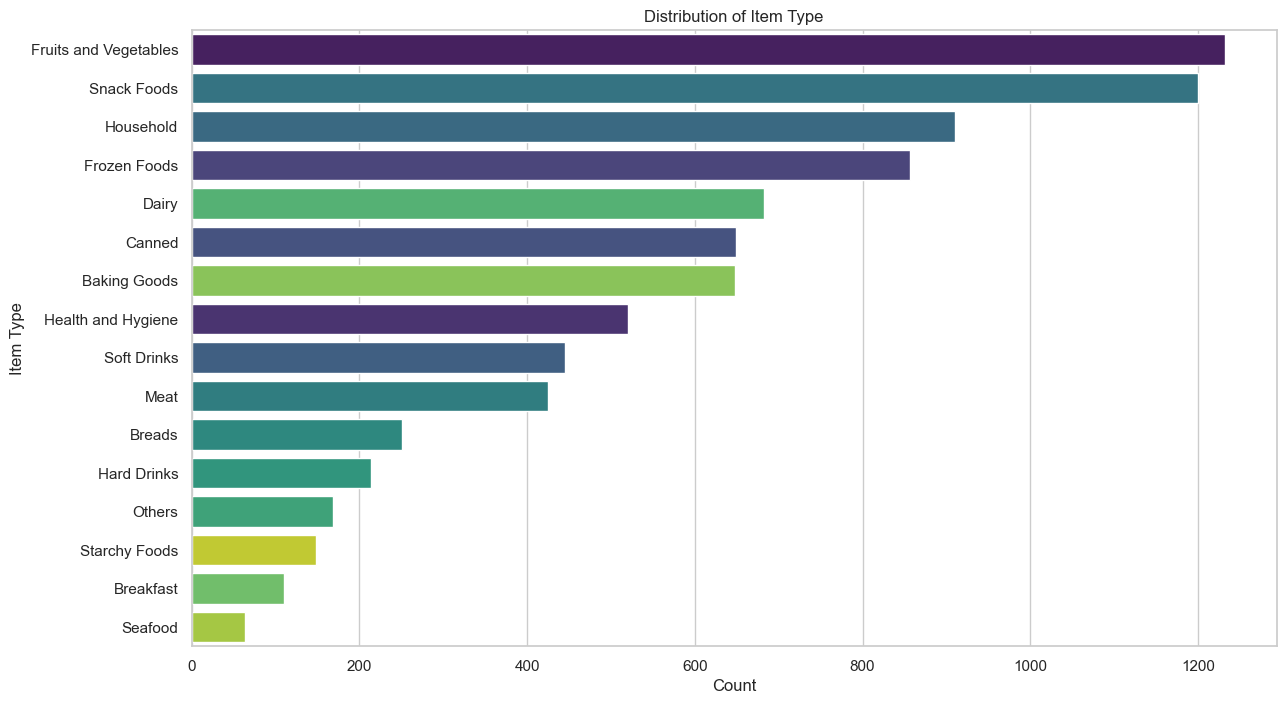

In [21]:
# Plot the distribution of the 'Item Type'
plt.figure(figsize=(14, 8))
sns.countplot(data=df, y='Item Type', hue='Item Type',palette='viridis',legend = False, order=df['Item Type'].value_counts().index)
plt.title('Distribution of Item Type')
plt.xlabel('Count')
plt.ylabel('Item Type')
plt.show()


In [22]:
df_group = df.groupby(['Item Identifier','Item Type'])['Sales'].sum().reset_index()
df_sort = df_group.sort_values(by='Sales', ascending = False)
df_sort = df_sort.reset_index(drop=True)
df_sort.index = df_sort.index + 1

C:\Users\abhin\AppData\Local\Temp\ipykernel_9308\2847284248.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outlet Type', y='Sales', data=df_sorted, palette='viridis')


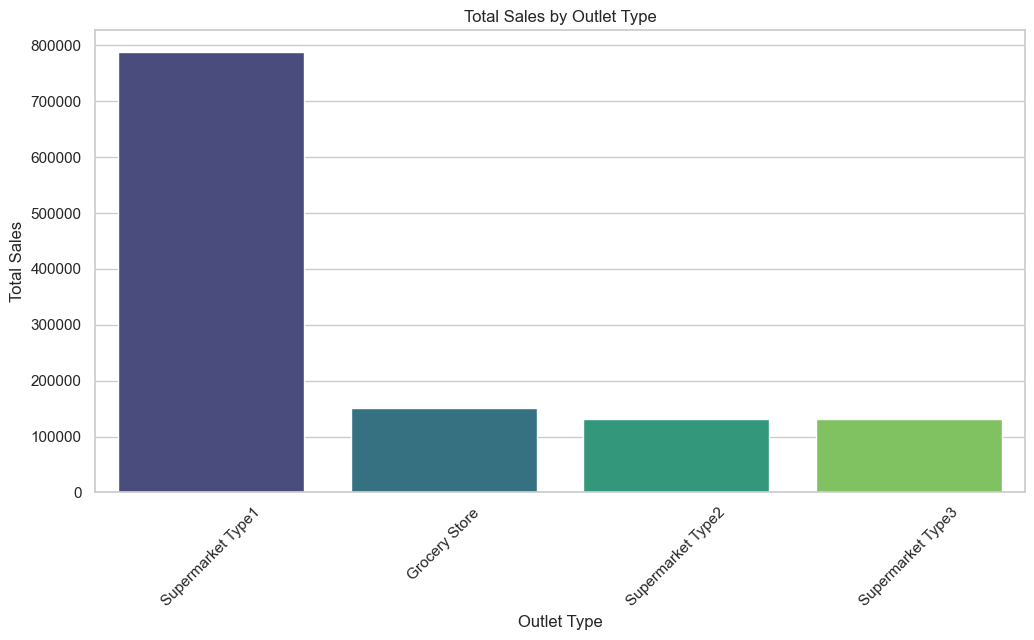

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Outlet Type', y='Sales', data=df_sorted, palette='viridis')
plt.title('Total Sales by Outlet Type')
plt.xlabel('Outlet Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

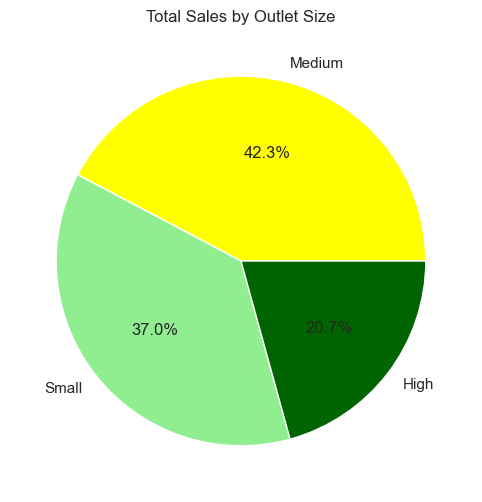

In [24]:
df_group = df.groupby('Outlet Size')['Sales'].sum().reset_index()
df_s = df_group.sort_values(by='Sales', ascending=False).reset_index(drop=True)
df_s.index = df_s.index + 1

colors = ['#FFFF00', '#90EE90', '#006400']
plt.figure(figsize=(12, 6))
plt.pie(df_s['Sales'], labels=df_s['Outlet Size'], autopct='%1.1f%%',colors=colors)
plt.title('Total Sales by Outlet Size')
plt.ylabel('')  # Pie charts usually don't need a y-label
plt.show()

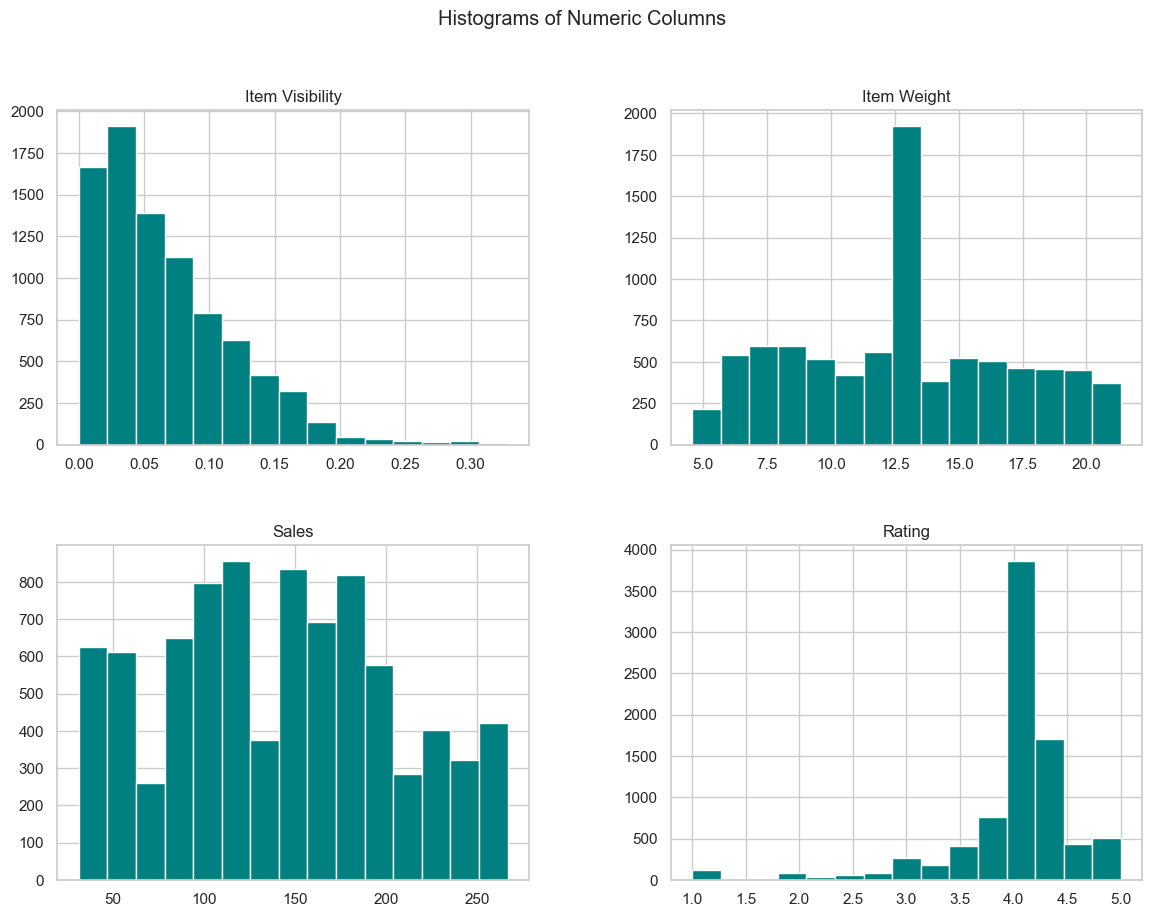

In [25]:
df[['Item Visibility', 'Item Weight', 'Sales', 'Rating']].hist(bins=15, figsize=(14, 10), color='teal')
plt.suptitle('Histograms of Numeric Columns')
plt.show()


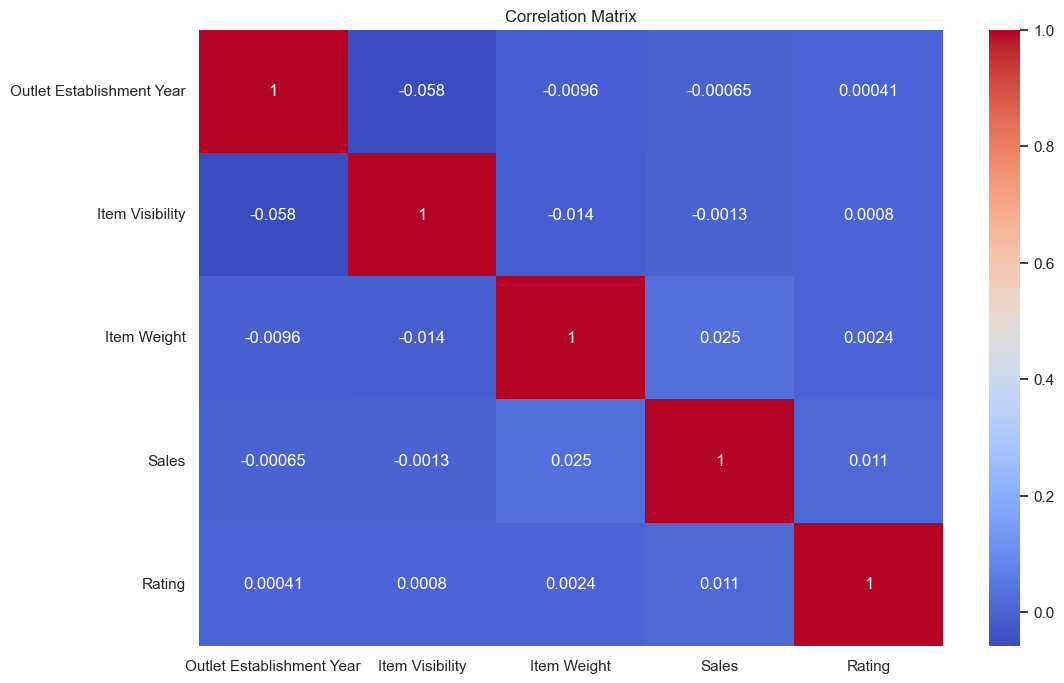

                            Sales             
                             mean          sum
Item Type                                     
Baking Goods           126.380766   81894.7364
Breads                 140.952669   35379.1198
Breakfast              141.788151   15596.6966
Canned                 139.763835   90706.7290
Dairy                  148.499211  101276.4616
Frozen Foods           138.503366  118558.8814
Fruits and Vegetables  144.581235  178124.0810
Hard Drinks            137.077947   29334.6806
Health and Hygiene     130.818921   68025.8388
Household              149.424753  135976.5254
Meat                   139.882032   59449.8638
Others                 132.851430   22451.8916
Seafood                141.841719    9077.8700
Snack Foods            146.194935  175433.9224
Soft Drinks            131.492510   58514.1670
Starchy Foods          147.838023   21880.0274


In [26]:
numeric_df = df.select_dtypes(include=[float, int])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
grouped_data = df.groupby('Item Type').agg({'Sales': ['mean', 'sum']})
print(grouped_data)



### summary

In [27]:
numeric_df = df.select_dtypes(include=[float, int])
summary = {
    'Dataset Shape': df.shape,
    'Missing Values': df.isnull().sum(),
    'Descriptive Statistics': numeric_df.describe(),
    'Correlation Matrix': numeric_df.corr(),
}


for key, value in summary.items():
    print(f"{key}:\n{value}\n")

Dataset Shape:
(8523, 12)

Missing Values:
Item Fat Content             0
Item Identifier              0
Item Type                    0
Outlet Establishment Year    0
Outlet Identifier            0
Outlet Location Type         0
Outlet Size                  0
Outlet Type                  0
Item Visibility              0
Item Weight                  0
Sales                        0
Rating                       0
dtype: int64

Descriptive Statistics:
       Outlet Establishment Year  Item Visibility  Item Weight        Sales  \
count                8523.000000      8523.000000   8523.00000  8523.000000   
mean                 2016.450546         0.066132     12.81342   140.992783   
std                     3.189396         0.051598      4.22724    62.275067   
min                  2011.000000         0.000000      4.55500    31.290000   
25%                  2014.000000         0.026989      9.31000    93.826500   
50%                  2016.000000         0.053931     12.60000   143.0128